In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('machine.csv')

1. vendor name: 30
(adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec,
dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson,
microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry,
sratus, wang)
2. Model Name: many unique symbols
3. MYCT: machine cycle time in nanoseconds (integer)
4. MMIN: minimum main memory in kilobytes (integer)
5. MMAX: maximum main memory in kilobytes (integer)
6. CACH: cache memory in kilobytes (integer)
7. CHMIN: minimum channels in units (integer)
8. CHMAX: maximum channels in units (integer)
9. PRP: published relative performance (integer)
10. ERP: estimated relative performance from the original article (integer)

In [4]:
df

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


Analyzing the relationship between machine cycle time (MYCT) and estimated relative performance(ERP)


<AxesSubplot:xlabel='MYCT', ylabel='ERP'>

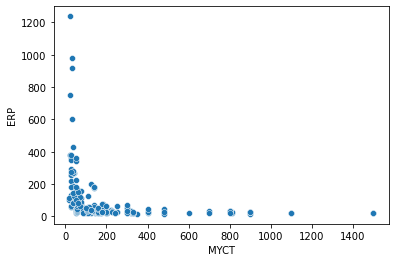

In [7]:
sns.scatterplot(x='MYCT',y='ERP',data=df)

Analyzing the pairwise relationship of all attributes in the dataset

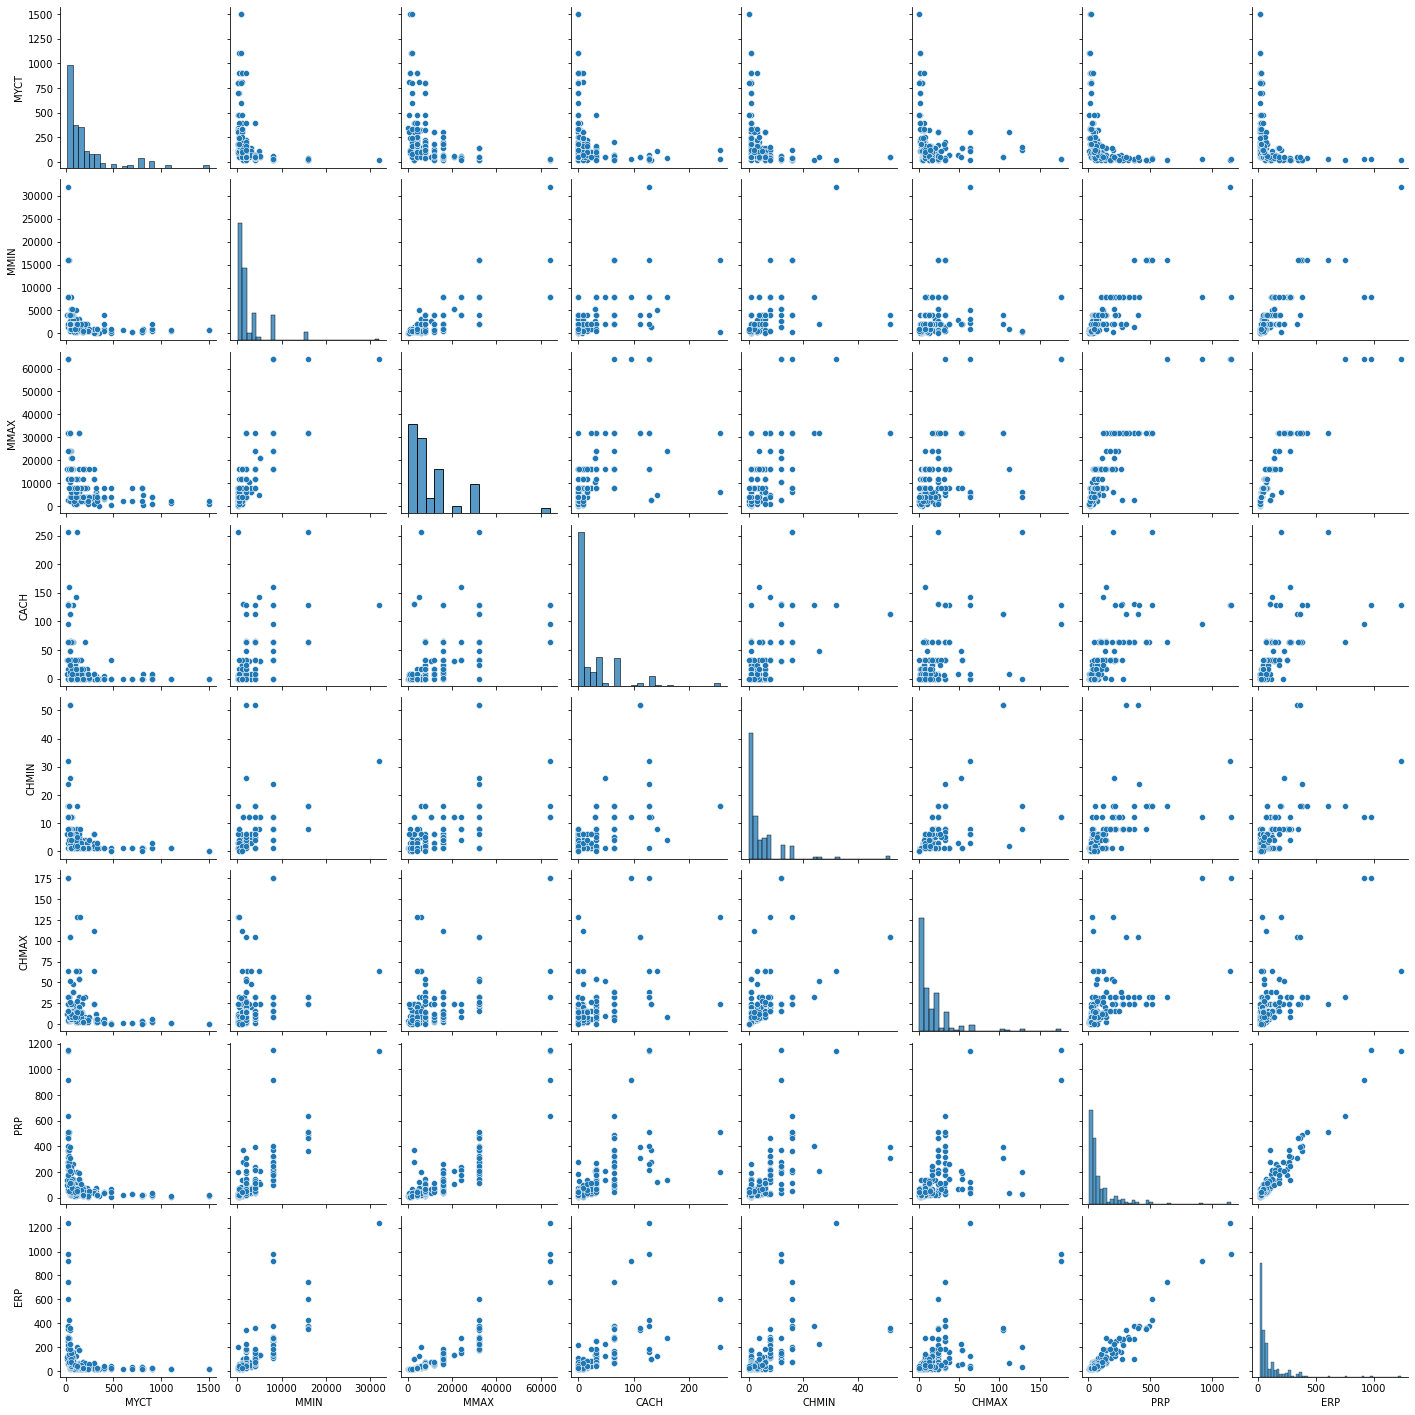

In [8]:
sns.pairplot(df)

In [10]:
df[(df['ERP']>500)] #Fetching data of machines that have an ERP over 500(high performing machines)

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238
156,nas,as/9060,30,16000,32000,256,16,24,510,603
198,sperry,1100/93,30,8000,64000,96,12,176,915,919
199,sperry,1100/94,30,8000,64000,128,12,176,1150,978


In [11]:
df[(df['Vendor Name']=='amdahl')] #Analyzing the performance amdahl machines

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [14]:
vname_erp = df[['Vendor Name','ERP']] #Cursory reading of vendors and the ERP of their machines
vname_erp

,Vendor Name,ERP
0,adviser,199
1,amdahl,253
2,amdahl,253
3,amdahl,253
4,amdahl,132
...,...,...
204,sperry,37
205,sperry,50
206,sratus,41
207,wang,47


<AxesSubplot:xlabel='Vendor Name', ylabel='ERP'>

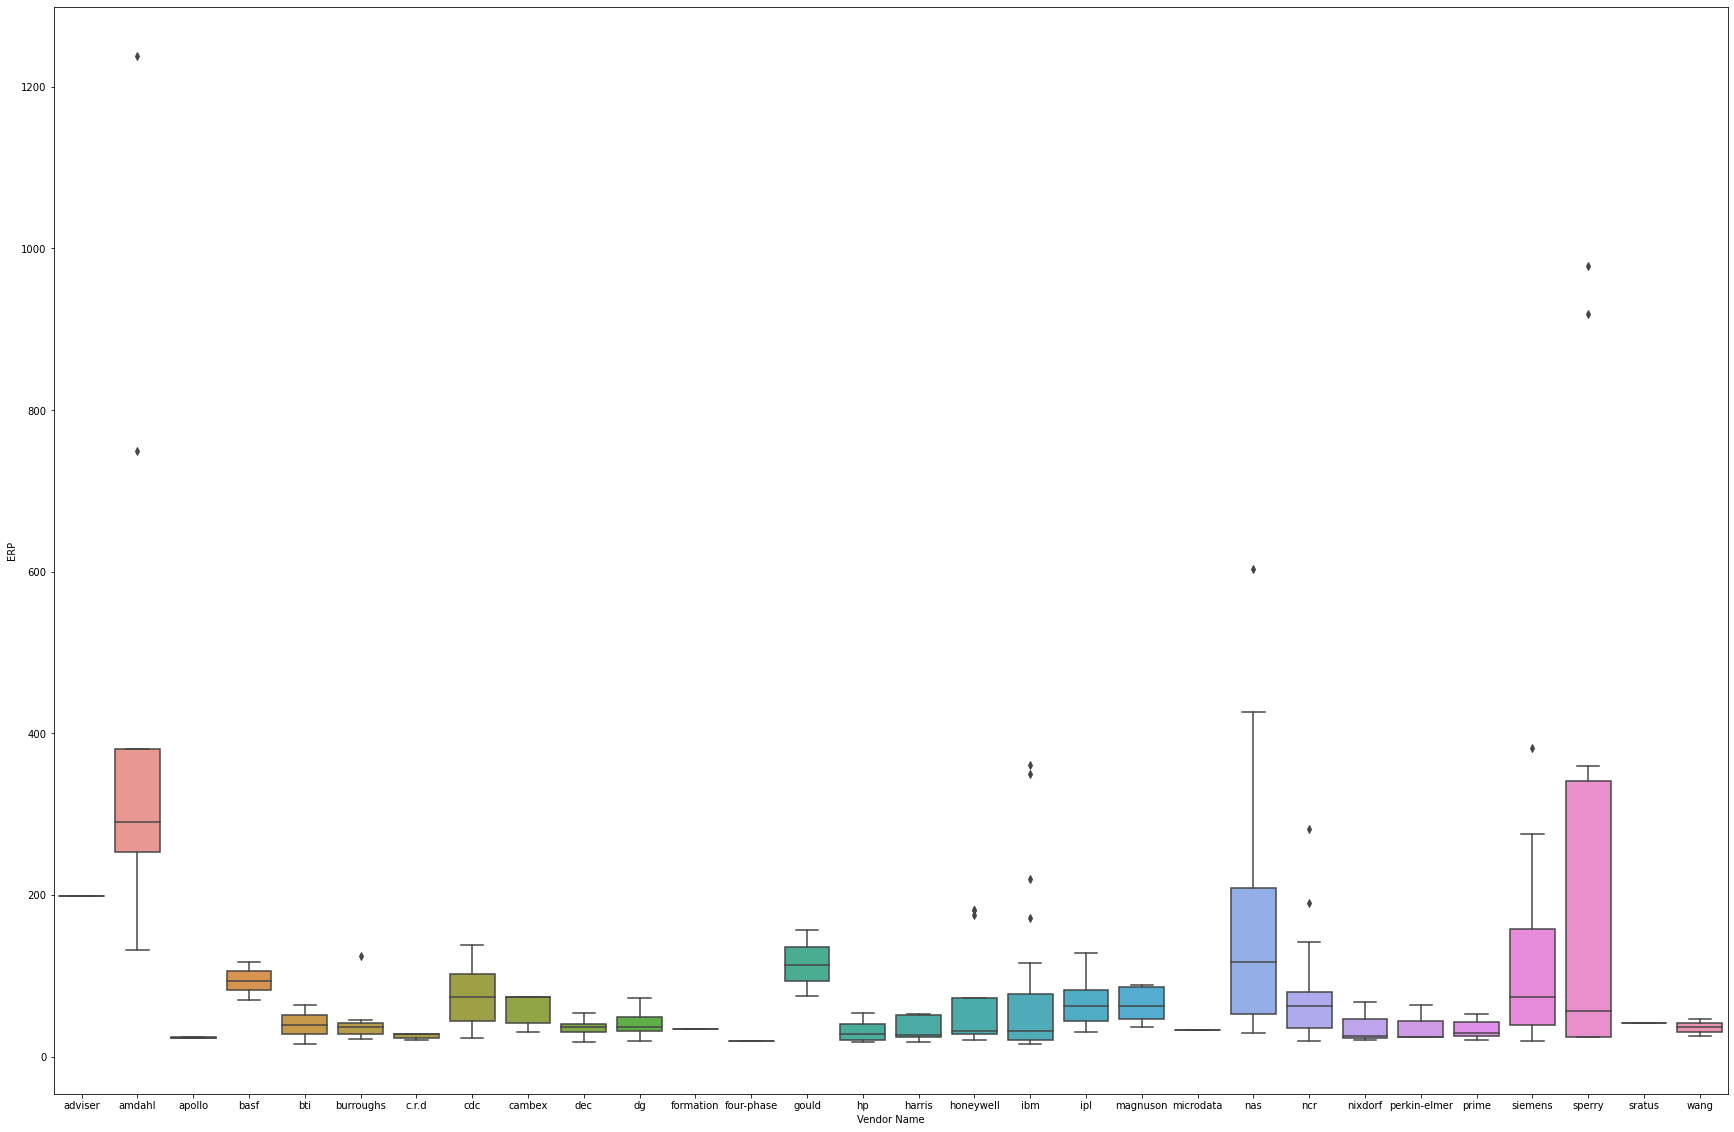

In [22]:
#Checked if there is any correlation between the vendor and the performance of their machines

plt.figure(figsize=(30,20))
sns.boxplot(x='Vendor Name',y='ERP',data=vname_erp)



From the boxplot above, it can be fairly concluded that there is no relationship between the vendors and the performance of their machines.

Hence the vendor and model name will be dropped while training the model.

In [27]:
X = df.drop(['Vendor Name','Model Name','ERP'],axis=1) # Vendor and model name are dropped
y = df['ERP'] 

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [33]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()


In [38]:
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
predictions = lr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

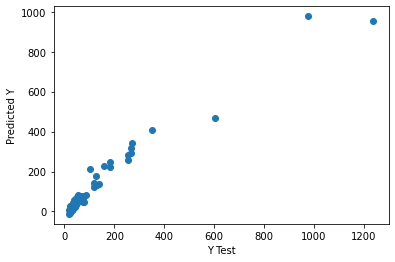

In [40]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [42]:
from sklearn import metrics


In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 26.641710233210848
MSE: 2406.1795242907688
RMSE: 49.052823815665995
